In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import tensorflow
import tqdm
import glob

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, BatchNormalization, Dropout, Activation,Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import torch
import random
from tqdm import tqdm
import torch.nn as nn
from tqdm import tqdm
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from google.colab import drive
from keras import utils as np_utils
import os
drive.mount('/content/drive')
import numpy as np
import tensorflow as tf
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import tensorflow
import tqdm
import glob

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize


import tensorflow as tf
import cv2

from sklearn.preprocessing import LabelEncoder
from keras.applications.resnet import ResNet50
from keras.applications.densenet import DenseNet121
from keras.applications.xception import Xception
from keras.applications.mobilenet import MobileNet
from keras.applications.inception_v3 import InceptionV3
from keras.applications.efficientnet import EfficientNetB5
from keras.applications.vgg16 import VGG16

from keras.applications import imagenet_utils
import numpy as np
import pickle
import os

import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths = os.path.join(dirname, filename)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=[]
labels=[]

height = 64
width = 64
channels = 3
classes = 5
n_inputs = height * width * channels

path1 = "/content/drive/My Drive/papsmear project/New folder/im_Dyskeratotic/CROPPED/"
path2 = "/content/drive/My Drive/papsmear project/New folder//im_Koilocytotic/CROPPED/"
path3 = "/content/drive/My Drive/papsmear project/New folder//im_Metaplastic/CROPPED/"
path4 = "/content/drive/My Drive/papsmear project/New folder//im_Parabasal/CROPPED/"
path5 = "/content/drive/My Drive/papsmear project/New folder//im_Superficial-Intermediate/CROPPED/"

path = [path1, path2, path3, path4, path5]

# print(Class)
i = 0
for p in path:
    Class=os.listdir(p)
    for a in Class:
        if(a[-1] == 'p'):
            labels.append(i)
            try:
                image=cv2.imread(p+a)
                image_from_array = Image.fromarray(image, 'RGB')
                size_image = image_from_array.resize((height, width))
                data.append(np.array(size_image))
            except AttributeError:
                print(" ")
    i+=1

# Converting data to ndarray -
labels = np.array(labels)
data = np.array(data)

print(data.shape)
print(labels.shape)
print(labels)

# Randomize the order of the input images
s = np.arange(data.shape[0])
np.random.seed(43)
np.random.shuffle(s)
data = data[s]
labels = labels[s]

(4049, 64, 64, 3)
(4049,)
[0 0 0 ... 4 4 4]


In [ ]:
from keras.api._v2.keras.applications import ResNet50V2
model_densenet     = DenseNet121(weights = 'imagenet', include_top = False)
model_res     = ResNet50(weights = 'imagenet', include_top = False)

model_efficientnet = EfficientNetB5(weights = 'imagenet', include_top = False)
model_Xception     = Xception(weights = 'imagenet', include_top = False)
model_MobileNet = MobileNet(weights = 'imagenet', include_top = False)
model_InceptionV3     = tf.keras.applications.regnet.RegNetX002(weights = 'imagenet', include_top = False)

feature_densenet=model_densenet(data)
feature_efficientnet=model_efficientnet(data)
feature_xception=model_Xception(data)
features_mobilenet=model_MobileNet(data)
features_inceptiont=model_InceptionV3(data)
features_densenet     = model_densenet.predict(data)
features_res=model_res.predict(data)
print(feature_xception.shape)
print(features_mobilenet.shape)
print(features_inceptiont.shape)
print(features_densenet.shape)
extracted_features = []


for kk,d_1,d_2,f_r, f_d,f_n, f_e, label in zip(features_res,feature_densenet,feature_efficientnet,feature_xception, features_mobilenet, features_inceptiont,features_densenet, labels):
    #print(f_r.shape[0] )
    #print(f_r.shape[1] )
    #print(f_r.shape[2] )
    d_1 = np.reshape(d_1,((d_1.shape[0] * d_1.shape[1] * d_1.shape[2])))
    d_2 = np.reshape(d_2,((d_2.shape[0] * d_2.shape[1] * d_2.shape[2])))
    f_r = np.reshape(f_r,((f_r.shape[0] * f_r.shape[1] * f_r.shape[2])))
    f_d = np.reshape(f_d,((f_d.shape[0] * f_d.shape[1] * f_d.shape[2])))
    f_n = np.reshape(f_n,((f_n.shape[0] * f_n.shape[1] * f_n.shape[2])))
    f_e = np.reshape(f_e,((f_e.shape[0] * f_e.shape[1] * f_e.shape[2])))
    kk=np.reshape(kk,((kk.shape[0] * kk.shape[1] * kk.shape[2])))
    #f_r = np.append(kk, f_e)
    #f_r = np.append(f_r, f_n)
    #f_r = np.append(f_r, f_d)
    #f_r = np.append(f_r, f_n)
    #f_r = np.append(f_r, f_e)
    #f_r = np.append(f_r, kk)
    print(f_d.shape)
    f_r = np.append(f_r, label)
    extracted_features.append(f_r)

extracted_features = np.array(extracted_features)

print(extracted_features.shape)

127/127 [==============================] - 2s 12ms/step
(4049, 2, 2, 2048)
(4049, 2, 2, 1024)
(4049, 2, 2, 368)
(4049, 2, 2, 1024)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
# # Normalization :-

X = extracted_features[:, 0:-1]
y = extracted_features[:, -1]

# scaler = StandardScaler()
# scaler.fit(X)
# scaled_X = scaler.transform(X)

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
# PCA :-

pca = PCA(n_components =.99)
pca.fit(scaled_X)
principal_X = pca.transform(scaled_X)

In [ ]:
# Train-Test-Split :-

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3239, 8192)
(810, 8192)
(3239,)
(810,)


In [ ]:
cc=tf.keras.utils.to_categorical(y_train, num_classes=5, dtype='float32')
print(cc)
cc1=tf.keras.utils.to_categorical(y_test, num_classes=5, dtype='float32')
print(cc1)

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]


Epoch 1/100
7/7 [==============================] - 2s 59ms/step - loss: 0.1758 - accuracy: 0.6934 - val_loss: 0.0790 - val_accuracy: 0.8852
Epoch 2/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0673 - accuracy: 0.9080 - val_loss: 0.0603 - val_accuracy: 0.9222
Epoch 3/100
7/7 [==============================] - 0s 31ms/step - loss: 0.0497 - accuracy: 0.9398 - val_loss: 0.0582 - val_accuracy: 0.9210
Epoch 4/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0377 - accuracy: 0.9657 - val_loss: 0.0597 - val_accuracy: 0.9235
Epoch 5/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0333 - accuracy: 0.9731 - val_loss: 0.0582 - val_accuracy: 0.9272
Epoch 6/100
7/7 [==============================] - 0s 22ms/step - loss: 0.0286 - accuracy: 0.9843 - val_loss: 0.0551 - val_accuracy: 0.9346
Epoch 7/100
7/7 [==============================] - 0s 31ms/step - loss: 0.0270 - accuracy: 0.9861 - val_loss: 0.0551 - val_accuracy: 0.9321
Epoch 8/100
7/7 [===

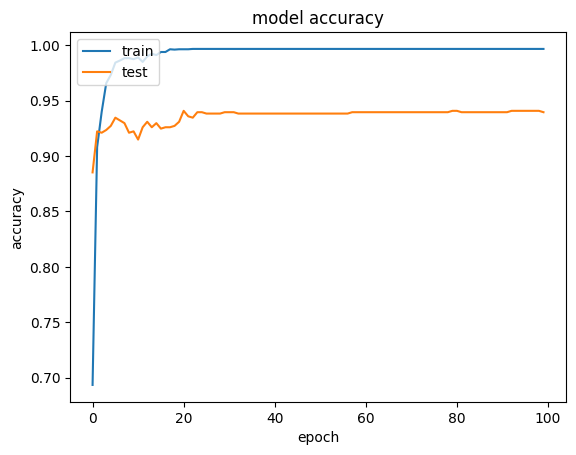

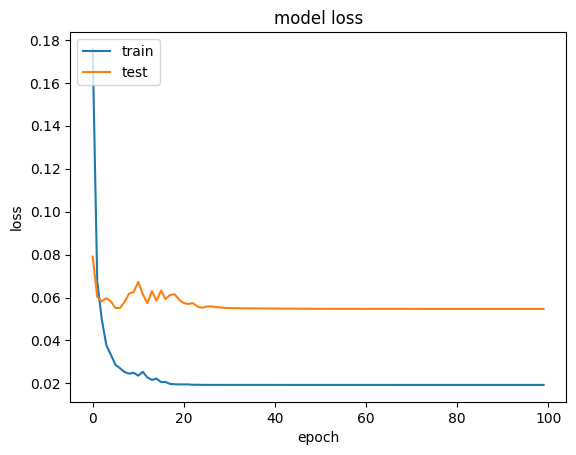

26/26 [==============================] - 0s 2ms/step
Accuracy is:  93.95061728395062
Classification Report: 
               precision    recall  f1-score   support

    Dyskerat       0.94      0.97      0.95       167
Koilocytotic       0.91      0.87      0.89       165
 Metaplastic       0.89      0.92      0.91       132
   Parabasal       0.99      0.96      0.97       174
 Superficial       0.96      0.97      0.97       172

    accuracy                           0.94       810
   macro avg       0.94      0.94      0.94       810
weighted avg       0.94      0.94      0.94       810



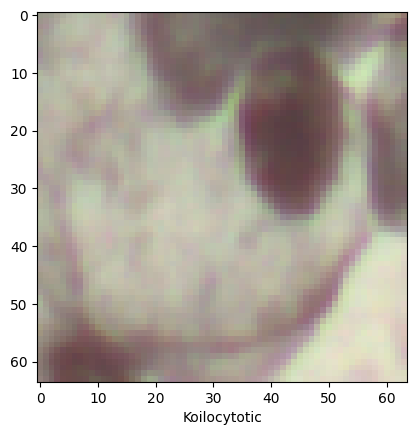

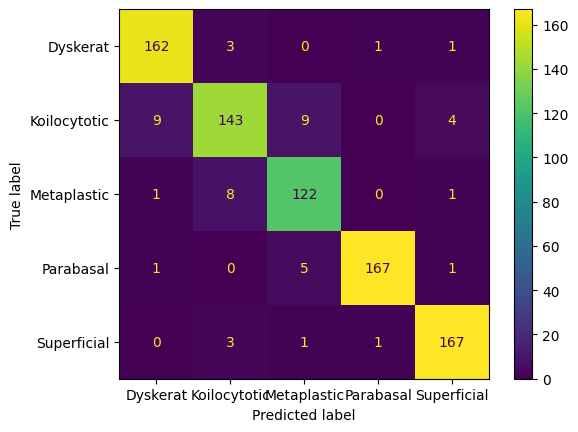

In [ ]:
#resent50
# Neural Net for classification :-
import keras.backend as K
import tensorflow as tf


def categorical_focal_loss_with_label_smoothing(gamma=2.0, alpha=0.25,ls=0.1,classes=5):
    """
        loss = -alpha*((1-p)^gamma)*log(p)
        y_ls = (1 - α) * y_hot + α / classes
  """
    def focal_loss(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred_ls = (1 - ls) * y_pred + ls / classes
        y_pred_ls = K.clip(y_pred_ls, epsilon, 1.0-epsilon)
        cross_entropy = -y_true*K.log(y_pred_ls)
        weight = alpha * y_true * K.pow((1-y_pred_ls), gamma)
        loss = weight * cross_entropy
        loss = K.sum(loss, axis=1)
        return cross_entropy

    return focal_loss

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,BatchNormalization
import keras.backend as K



model = Sequential()

model.add(Flatten(input_shape=(X_train.shape[1], 1)))


model.add(Dense(1024, activation='swish'))

model.add(Dense(1024, activation='swish'))

model.add(Dense(5, activation='softmax'))

#Compilation of the model
model.compile(
    loss=categorical_focal_loss_with_label_smoothing(),
    optimizer='adam',
    metrics=['accuracy']
)
epochs = 100
nn = model.fit(X_train, cc,validation_data=(X_test,cc1), batch_size=500, epochs=epochs)

import numpy as np
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import tensorflow
import tqdm
import glob
plt.plot(nn.history['accuracy'])

    #plt.plot(history.history['accuracy'])
plt.plot(nn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
        #summarize history for loss
plt.plot(nn.history['loss'])
plt.plot(nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred = model.predict(X_test)
y_nn = np.argmax(pred, axis=1)
categories = ["Dyskerat", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial"]

def show_the_image(i):
    plt.imshow(data[i])
    plt.xlabel(categories[labels[i]])

show_the_image(0)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_nn)
print("Accuracy is: ", acc*100)

from sklearn.metrics import confusion_matrix, classification_report
#target_names=categories
print("Classification Report: \n", classification_report(y_test, y_nn,target_names=categories))
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_nn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =categories)
cm_display.plot()
plt.show()

Epoch 1/100
7/7 [==============================] - 3s 59ms/step - loss: 0.2108 - accuracy: 0.5974 - val_loss: 0.1376 - val_accuracy: 0.7519
Epoch 2/100
7/7 [==============================] - 0s 19ms/step - loss: 0.1299 - accuracy: 0.7684 - val_loss: 0.0959 - val_accuracy: 0.8383
Epoch 3/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0925 - accuracy: 0.8487 - val_loss: 0.0971 - val_accuracy: 0.8272
Epoch 4/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0815 - accuracy: 0.8666 - val_loss: 0.0781 - val_accuracy: 0.8790
Epoch 5/100
7/7 [==============================] - 0s 22ms/step - loss: 0.0679 - accuracy: 0.8975 - val_loss: 0.0726 - val_accuracy: 0.8827
Epoch 6/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0586 - accuracy: 0.9213 - val_loss: 0.0688 - val_accuracy: 0.8840
Epoch 7/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0521 - accuracy: 0.9373 - val_loss: 0.0654 - val_accuracy: 0.8975
Epoch 8/100
7/7 [===

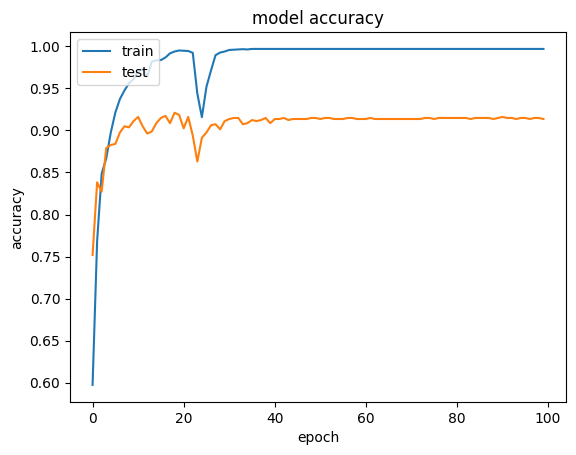

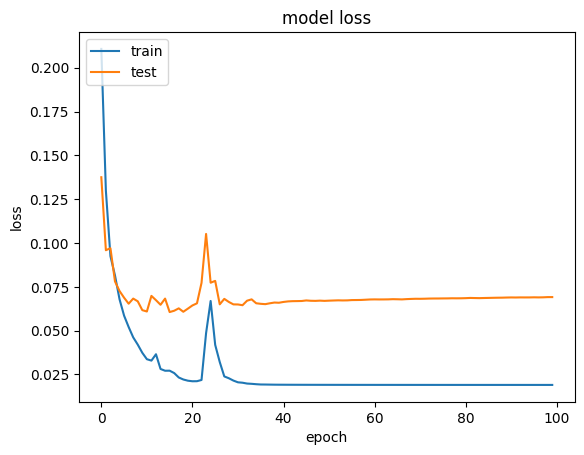

26/26 [==============================] - 0s 2ms/step
Accuracy is:  91.35802469135803
Classification Report: 
               precision    recall  f1-score   support

    Dyskerat       0.91      0.93      0.92       167
Koilocytotic       0.87      0.85      0.86       165
 Metaplastic       0.86      0.92      0.89       132
   Parabasal       0.98      0.93      0.96       174
 Superficial       0.94      0.93      0.93       172

    accuracy                           0.91       810
   macro avg       0.91      0.91      0.91       810
weighted avg       0.91      0.91      0.91       810



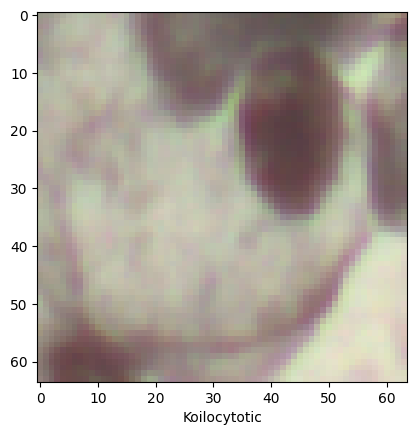

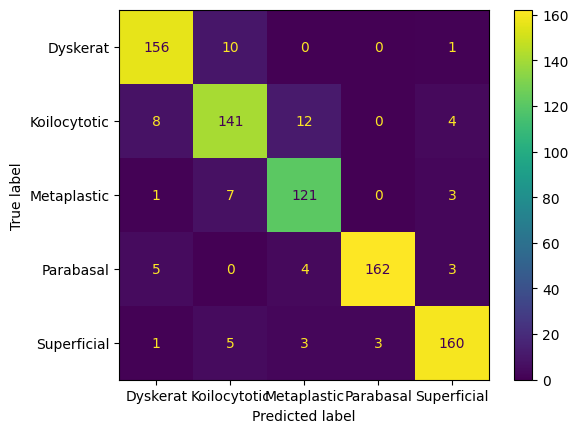

In [ ]:
#densenet

# Neural Net for classification :-
import keras.backend as K
import tensorflow as tf


def categorical_focal_loss_with_label_smoothing(gamma=2.0, alpha=0.25,ls=0.1,classes=5):
    """
        loss = -alpha*((1-p)^gamma)*log(p)
        y_ls = (1 - α) * y_hot + α / classes
  """
    def focal_loss(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred_ls = (1 - ls) * y_pred + ls / classes
        y_pred_ls = K.clip(y_pred_ls, epsilon, 1.0-epsilon)
        cross_entropy = -y_true*K.log(y_pred_ls)
        weight = alpha * y_true * K.pow((1-y_pred_ls), gamma)
        loss = weight * cross_entropy
        loss = K.sum(loss, axis=1)
        return cross_entropy

    return focal_loss

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,BatchNormalization
import keras.backend as K



model = Sequential()

model.add(Flatten(input_shape=(X_train.shape[1], 1)))


model.add(Dense(1024, activation='swish'))

model.add(Dense(1024, activation='swish'))

model.add(Dense(5, activation='softmax'))

#Compilation of the model
model.compile(
    loss=categorical_focal_loss_with_label_smoothing(),
    optimizer='adam',
    metrics=['accuracy']
)
epochs = 100
nn = model.fit(X_train, cc,validation_data=(X_test,cc1), batch_size=500, epochs=epochs)

import numpy as np
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import tensorflow
import tqdm
import glob
plt.plot(nn.history['accuracy'])

    #plt.plot(history.history['accuracy'])
plt.plot(nn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
        #summarize history for loss
plt.plot(nn.history['loss'])
plt.plot(nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred = model.predict(X_test)
y_nn = np.argmax(pred, axis=1)
categories = ["Dyskerat", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial"]

def show_the_image(i):
    plt.imshow(data[i])
    plt.xlabel(categories[labels[i]])

show_the_image(0)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_nn)
print("Accuracy is: ", acc*100)

from sklearn.metrics import confusion_matrix, classification_report
#target_names=categories
print("Classification Report: \n", classification_report(y_test, y_nn,target_names=categories))
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_nn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =categories)
cm_display.plot()
plt.show()

Epoch 1/100
7/7 [==============================] - 2s 75ms/step - loss: 0.4620 - accuracy: 0.2921 - val_loss: 0.3343 - val_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - 0s 32ms/step - loss: 0.3152 - accuracy: 0.4492 - val_loss: 0.2480 - val_accuracy: 0.5049
Epoch 3/100
7/7 [==============================] - 0s 36ms/step - loss: 0.2165 - accuracy: 0.5832 - val_loss: 0.2005 - val_accuracy: 0.6370
Epoch 4/100
7/7 [==============================] - 0s 32ms/step - loss: 0.1791 - accuracy: 0.6607 - val_loss: 0.1592 - val_accuracy: 0.7000
Epoch 5/100
7/7 [==============================] - 0s 34ms/step - loss: 0.1583 - accuracy: 0.7018 - val_loss: 0.1650 - val_accuracy: 0.6778
Epoch 6/100
7/7 [==============================] - 0s 31ms/step - loss: 0.1445 - accuracy: 0.7258 - val_loss: 0.1502 - val_accuracy: 0.7136
Epoch 7/100
7/7 [==============================] - 0s 34ms/step - loss: 0.1328 - accuracy: 0.7558 - val_loss: 0.1381 - val_accuracy: 0.7444
Epoch 8/100
7/7 [===

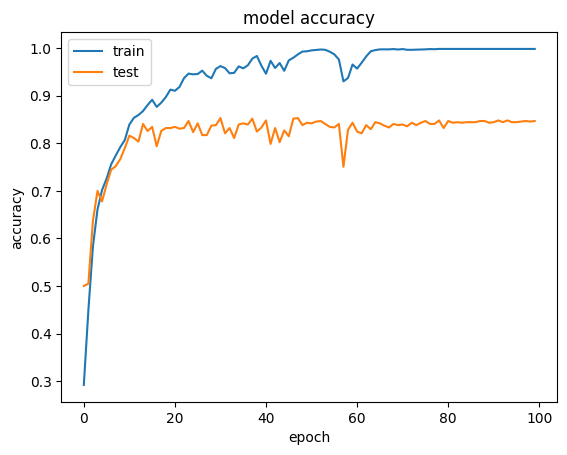

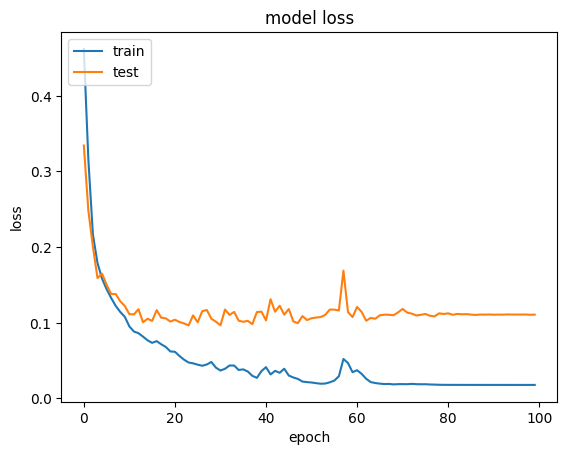

26/26 [==============================] - 0s 2ms/step
Accuracy is:  84.69135802469135
Classification Report: 
               precision    recall  f1-score   support

    Dyskerat       0.83      0.84      0.83       167
Koilocytotic       0.76      0.81      0.79       165
 Metaplastic       0.76      0.76      0.76       132
   Parabasal       0.97      0.90      0.93       174
 Superficial       0.91      0.91      0.91       172

    accuracy                           0.85       810
   macro avg       0.84      0.84      0.84       810
weighted avg       0.85      0.85      0.85       810



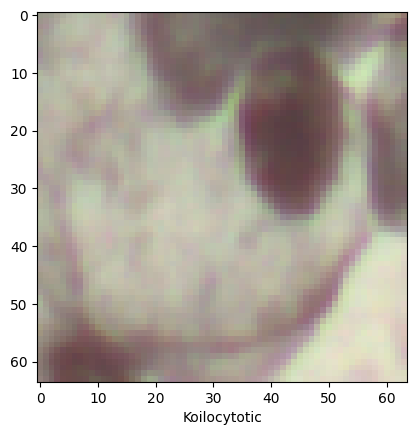

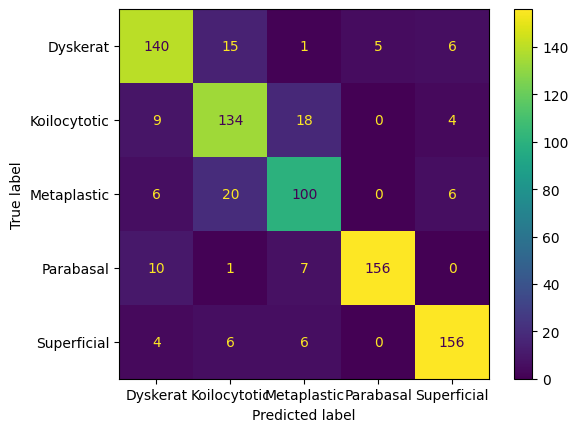

In [ ]:
#efficientnet
#densenet

# Neural Net for classification :-
import keras.backend as K
import tensorflow as tf


def categorical_focal_loss_with_label_smoothing(gamma=2.0, alpha=0.25,ls=0.1,classes=5):
    """
        loss = -alpha*((1-p)^gamma)*log(p)
        y_ls = (1 - α) * y_hot + α / classes
  """
    def focal_loss(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred_ls = (1 - ls) * y_pred + ls / classes
        y_pred_ls = K.clip(y_pred_ls, epsilon, 1.0-epsilon)
        cross_entropy = -y_true*K.log(y_pred_ls)
        weight = alpha * y_true * K.pow((1-y_pred_ls), gamma)
        loss = weight * cross_entropy
        loss = K.sum(loss, axis=1)
        return cross_entropy

    return focal_loss

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,BatchNormalization
import keras.backend as K



model = Sequential()

model.add(Flatten(input_shape=(X_train.shape[1], 1)))


model.add(Dense(1024, activation='swish'))

model.add(Dense(1024, activation='swish'))

model.add(Dense(5, activation='softmax'))

#Compilation of the model
model.compile(
    loss=categorical_focal_loss_with_label_smoothing(),
    optimizer='adam',
    metrics=['accuracy']
)
epochs = 100
nn = model.fit(X_train, cc,validation_data=(X_test,cc1), batch_size=500, epochs=epochs)

import numpy as np
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import tensorflow
import tqdm
import glob
plt.plot(nn.history['accuracy'])

    #plt.plot(history.history['accuracy'])
plt.plot(nn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
        #summarize history for loss
plt.plot(nn.history['loss'])
plt.plot(nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred = model.predict(X_test)
y_nn = np.argmax(pred, axis=1)
categories = ["Dyskerat", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial"]

def show_the_image(i):
    plt.imshow(data[i])
    plt.xlabel(categories[labels[i]])

show_the_image(0)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_nn)
print("Accuracy is: ", acc*100)

from sklearn.metrics import confusion_matrix, classification_report
#target_names=categories
print("Classification Report: \n", classification_report(y_test, y_nn,target_names=categories))
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_nn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =categories)
cm_display.plot()
plt.show()

Epoch 1/100
7/7 [==============================] - 4s 101ms/step - loss: 0.5032 - accuracy: 0.2643 - val_loss: 0.5740 - val_accuracy: 0.2420
Epoch 2/100
7/7 [==============================] - 0s 40ms/step - loss: 0.5518 - accuracy: 0.2708 - val_loss: 0.5511 - val_accuracy: 0.2901
Epoch 3/100
7/7 [==============================] - 0s 52ms/step - loss: 0.5247 - accuracy: 0.3180 - val_loss: 0.5283 - val_accuracy: 0.3099
Epoch 4/100
7/7 [==============================] - 0s 41ms/step - loss: 0.5146 - accuracy: 0.3223 - val_loss: 0.5362 - val_accuracy: 0.3037
Epoch 5/100
7/7 [==============================] - 0s 40ms/step - loss: 0.5168 - accuracy: 0.3220 - val_loss: 0.5208 - val_accuracy: 0.3309
Epoch 6/100
7/7 [==============================] - 0s 40ms/step - loss: 0.5036 - accuracy: 0.3455 - val_loss: 0.5188 - val_accuracy: 0.3395
Epoch 7/100
7/7 [==============================] - 0s 32ms/step - loss: 0.5006 - accuracy: 0.3486 - val_loss: 0.5107 - val_accuracy: 0.3432
Epoch 8/100
7/7 [==

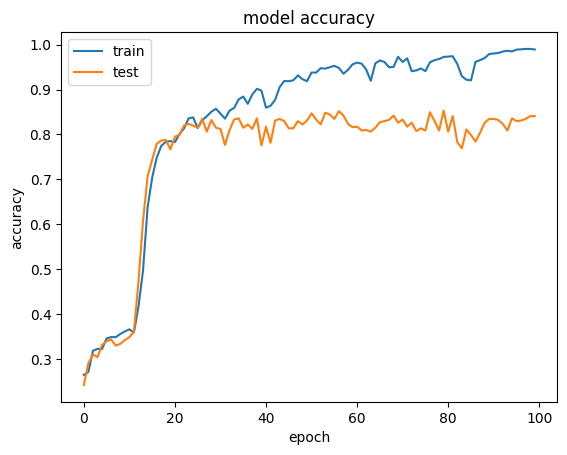

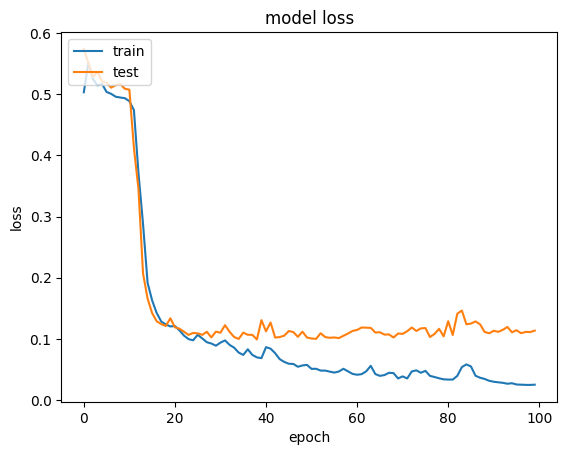

26/26 [==============================] - 0s 2ms/step
Accuracy is:  84.07407407407408
Classification Report: 
               precision    recall  f1-score   support

    Dyskerat       0.86      0.86      0.86       167
Koilocytotic       0.77      0.65      0.71       165
 Metaplastic       0.79      0.82      0.81       132
   Parabasal       0.95      0.90      0.92       174
 Superficial       0.82      0.96      0.89       172

    accuracy                           0.84       810
   macro avg       0.84      0.84      0.84       810
weighted avg       0.84      0.84      0.84       810



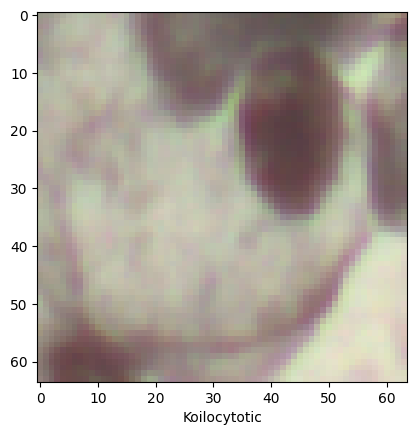

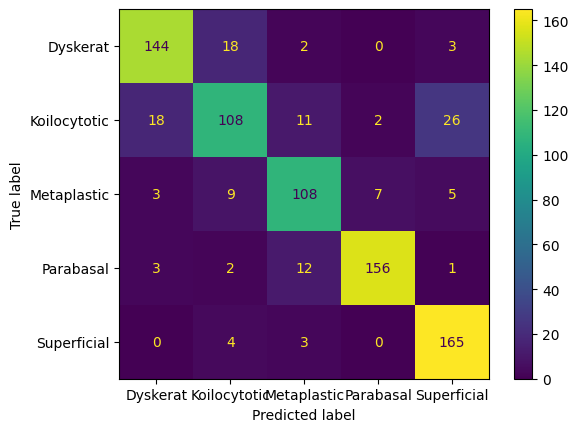

In [ ]:
#mobilenet
#efficientnet
#densenet

# Neural Net for classification :-
import keras.backend as K
import tensorflow as tf


def categorical_focal_loss_with_label_smoothing(gamma=2.0, alpha=0.25,ls=0.1,classes=5):
    """
        loss = -alpha*((1-p)^gamma)*log(p)
        y_ls = (1 - α) * y_hot + α / classes
  """
    def focal_loss(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred_ls = (1 - ls) * y_pred + ls / classes
        y_pred_ls = K.clip(y_pred_ls, epsilon, 1.0-epsilon)
        cross_entropy = -y_true*K.log(y_pred_ls)
        weight = alpha * y_true * K.pow((1-y_pred_ls), gamma)
        loss = weight * cross_entropy
        loss = K.sum(loss, axis=1)
        return cross_entropy

    return focal_loss

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,BatchNormalization
import keras.backend as K



model = Sequential()

model.add(Flatten(input_shape=(X_train.shape[1], 1)))


model.add(Dense(1024, activation='swish'))

model.add(Dense(1024, activation='swish'))

model.add(Dense(5, activation='softmax'))

#Compilation of the model
model.compile(
    loss=categorical_focal_loss_with_label_smoothing(),
    optimizer='adam',
    metrics=['accuracy']
)
epochs = 100
nn = model.fit(X_train, cc,validation_data=(X_test,cc1), batch_size=500, epochs=epochs)

import numpy as np
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import tensorflow
import tqdm
import glob
plt.plot(nn.history['accuracy'])

    #plt.plot(history.history['accuracy'])
plt.plot(nn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
        #summarize history for loss
plt.plot(nn.history['loss'])
plt.plot(nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred = model.predict(X_test)
y_nn = np.argmax(pred, axis=1)
categories = ["Dyskerat", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial"]

def show_the_image(i):
    plt.imshow(data[i])
    plt.xlabel(categories[labels[i]])

show_the_image(0)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_nn)
print("Accuracy is: ", acc*100)

from sklearn.metrics import confusion_matrix, classification_report
#target_names=categories
print("Classification Report: \n", classification_report(y_test, y_nn,target_names=categories))
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_nn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =categories)
cm_display.plot()
plt.show()